# 1

Consider the equations of motion governing the system:

\begin{align*}
    m_1 \ddot{x}_1 &= -k_1 x_1 + k(x_2 - x_1) \\
    m_2 \ddot{x}_2 &= - k(x_2 - x_1) -k_2 x_2 \\
\end{align*}

Rewriting acceleration as the change in velocity $\dot{v} = \ddot{x}$ and recalling that $\dot{x} = v$ leads to the following system of first-order differential equations:

\begin{align*}
    \dot{x}_1 &= v_1 \\
    \dot{x}_2 &= v_2 \\
    \dot{v}_1 &= -\frac{k_1}{m_1} x_1 + \frac{k}{m_1}(x_2 - x_1) \\
    \dot{v}_2 &= - \frac{k}{m_2}(x_2 - x_1) -\frac{k_2}{m_2} x_2 \\
\end{align*}

These equations will allow us to calculate the velocity and position of the masses using the Euler Method.

# 2

In order to implement the Euler Method we must do the following:

1. Write down the differential equations governing the system (we did this in the previous question).  

2. Create a function that returns the value of the derivatives of x_1, x_2, v_1 and v_2 given given their values at a given time.  

3. Loop over however many time steps we want to plot for, multiplying the derivatives of the variables with the time step size and adding the result to the variables.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [24]:
# Initial conditions
x_1 = 1
x_2 = 0
v_1 = 0
v_2 = 0

# Parameters
m_1 = 1 # kg
m_2 = 1 # kg
k = 1 # N/m
k_1 = 2 # N/m
k_2 = 2 # N/m


In [25]:
def derivatives(vars):
    '''Takes in a numpy array of values of the variables [x_1, x_2, v_1, v_2] and returns a numpy array containing the values of their derivatives [Dx_1, Dx_2, Dv_1, Dv_2]'''
    x_1, x_2, v_1, v_2 = [val for val in vars]

    # These are just the equations of motion
    Dx_1 = v_1
    Dx_2 = v_2
    
    Dv_1 = - (k_1 / m_1) * x_1 + (k/m_1)*(x_2 - x_1)
    Dv_2 = - (k/m_2)*(x_2 - x_1) - (k_2/m_2)*x_2

    return np.array([Dx_1, Dx_2, Dv_1, Dv_2])

def trajectory(time_to_plot, dt):
    '''
    Calculates the trajectory of the masses from t=0 to t=time_to_plot (in seconds) using a time step of dt (in seconds).
    '''
    # Calculates the number of time steps to plot for to reach time_to_plot
    n_time_steps = int(time_to_plot / dt)
    
    # We initialize the array of variables using the initial conditions
    vars = [x_1, x_2, v_1, v_2]
    t = 0

    # We initialize the results array as a (n,3) array of zeros
    res = np.zeros((n_time_steps, 3))
    
    # We loop over the time steps and calculate the new values of the variables
    for i in range(n_time_steps):
        # We store the time in the first column of the results array and store the position of the masses in the second and third columns
        res[i] = [t, vars[0], vars[1]]
    
        # Euler Integration gives us the new values of the variables
        vars += dt*derivatives(vars)

        # We increment the time before the next iteration of the loop
        t += dt
    
    return res

def plot_trajectory(res):
    '''Plots the trajectory of the masses'''
    plt.plot(res[:,0], res[:,1], label=r'$x_1$')
    plt.plot(res[:,0], res[:,2], label=r'$x_2$')
    plt.xlabel('Time (s)')
    plt.ylabel('Position (m)')
    plt.xlim(0, max(res[:,0]))
    plt.ylim(min(res[:,1])-0.1, max(res[:,2])+0.1)
    plt.legend()
    plt.show()
    


# 3

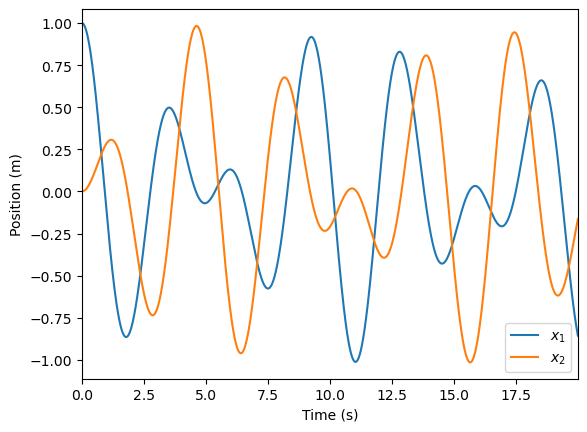

In [29]:
res = trajectory(20, 0.001)

plot_trajectory(res)